In [523]:
#loading dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

Exploratory data analysis

In [525]:
#loading data set
churn_data = pd.read_csv("Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

'''''''

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents


Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next

''''''

In [527]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [528]:
churn_data.shape

(7043, 21)

In [529]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [530]:
churn_data.describe(include=object).T  #rows as features and columns as statistics.

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [531]:
#converting the columns to required format 
churn_data['TotalCharges'] = pd.to_numeric(churn_data.TotalCharges, errors='coerce')  # converting to numeric(others to Nan)
churn_data["SeniorCitizen"] = churn_data["SeniorCitizen"].map({0: "No", 1: "Yes"})    # mapping yes/no to 1/0


In [532]:
#dropping customerID
churn_data = churn_data.drop(['customerID'], axis = 1)

In [533]:
churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [534]:
churn_data[churn_data['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [535]:
churn_data.drop(labels=churn_data[churn_data['tenure'] == 0].index, axis=0, inplace=True)

In [536]:
churn_data.duplicated().sum()

22

In [537]:
churn_data.drop_duplicates(inplace=True)

In [538]:
print(f"Number of rows after removing duplicates: {churn_data.shape[0]}")

Number of rows after removing duplicates: 7010


In [539]:
churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [540]:
churn_data["InternetService"].describe()

count            7010
unique              3
top       Fiber optic
freq             3090
Name: InternetService, dtype: object

In [541]:

churn_data['MonthlyCharges'] = pd.to_numeric(churn_data['MonthlyCharges'], errors='coerce')
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')


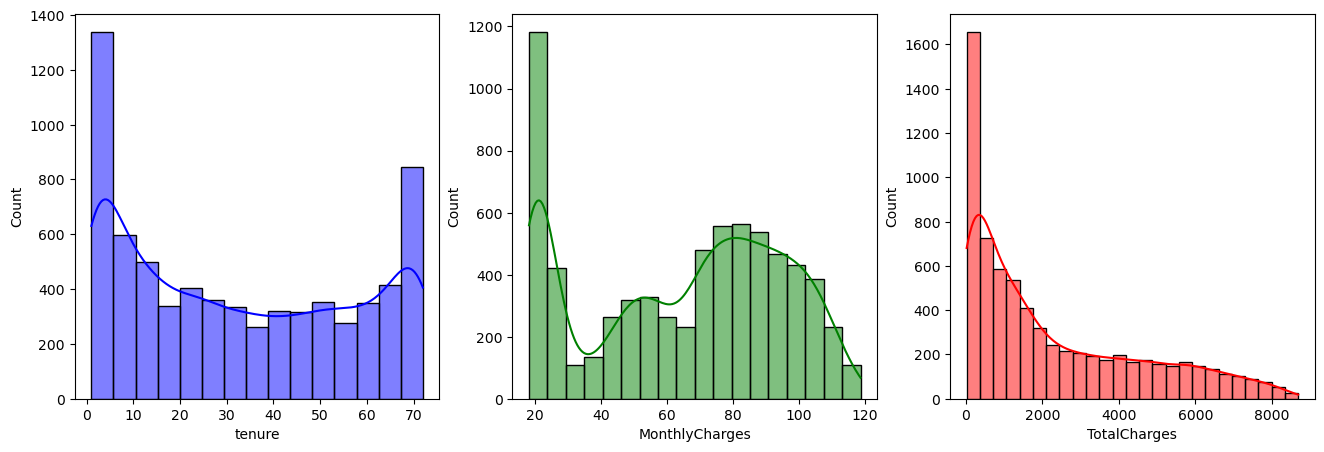

In [542]:
#Outliers checking 

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(churn_data['tenure'],kde=True,color='blue')
plt.subplot(1,3,2)
sns.histplot(churn_data['MonthlyCharges'],kde=True,color='green')
plt.subplot(1,3,3)
sns.histplot(churn_data['TotalCharges'],kde=True,color='red')
plt.show()

In [543]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(churn_data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = churn_data[i][(churn_data[i] > ul) | (churn_data[i] < ll)]
    print(f'* {i} outlier points***', '\n', outliers, '\n')
detect_outliers(['tenure', 'MonthlyCharges', 'TotalCharges'])

* tenure outlier points*** 
 Series([], Name: tenure, dtype: int64) 

* MonthlyCharges outlier points*** 
 Series([], Name: MonthlyCharges, dtype: float64) 

* TotalCharges outlier points*** 
 Series([], Name: TotalCharges, dtype: float64) 



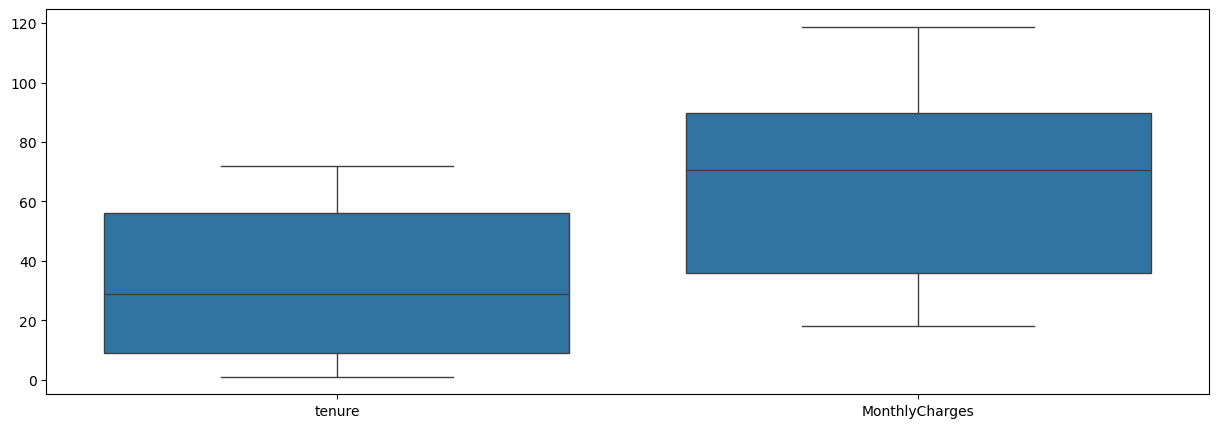

In [544]:
#box plot
plt.figure(figsize=(15, 5))
sns.boxplot(data=churn_data[['tenure',]])
sns.boxplot(data=churn_data[['MonthlyCharges',]])
plt.show()


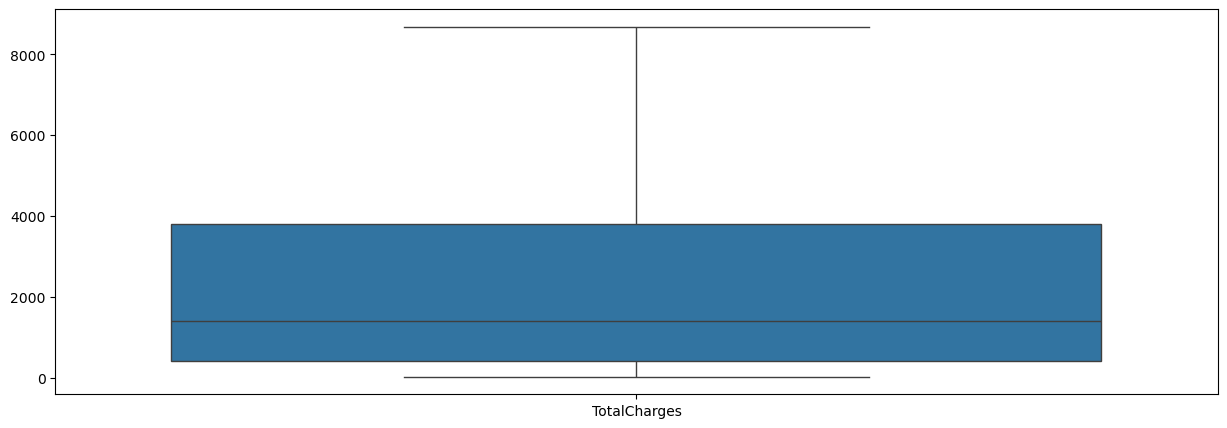

In [545]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=churn_data[['TotalCharges',]])
plt.show()

No outliers detected in the data 

DATA VISUALIZATION

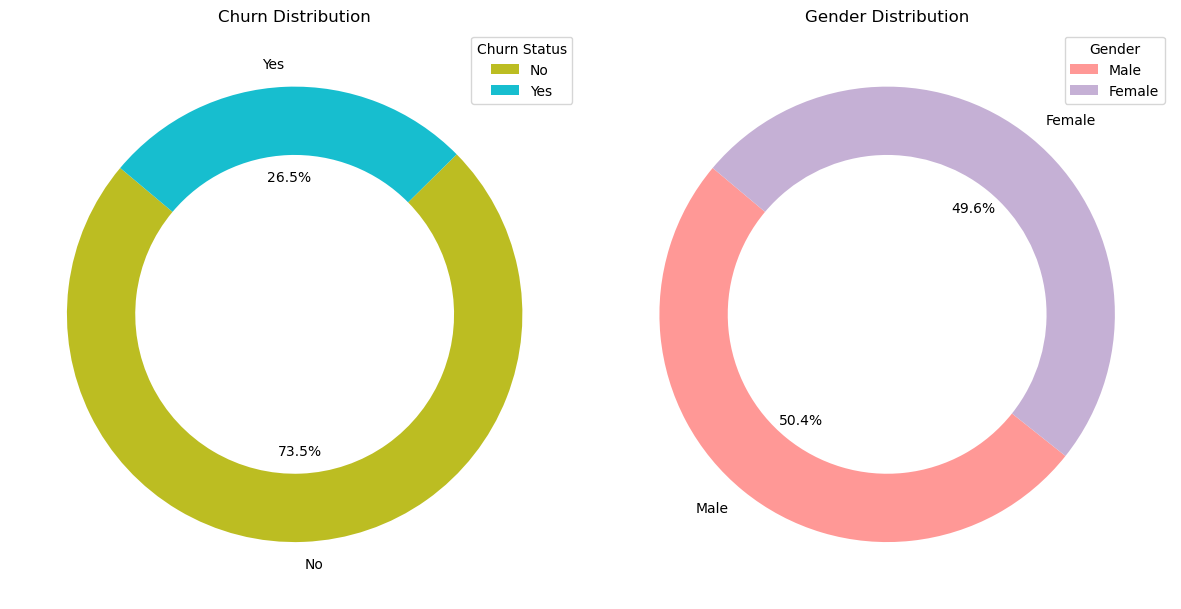

In [548]:
#"Churn and Gender Distribution"


# Calculate the counts for 'Churn' and 'gender'
churn_counts = churn_data['Churn'].value_counts()
gender_counts = churn_data['gender'].value_counts()

# Define colors for the pie charts
colors_churn = ['#bcbd22', '#17becf']
colors_gender = ['#ff9896', '#c5b0d5']

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the first donut chart for 'Churn'
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_churn, wedgeprops=dict(width=0.3))
plt.title('Churn Distribution')


# Add a legend for Churn
plt.legend(churn_counts.index, loc="best", title="Churn Status")

# Plot the second donut chart for 'Gender'
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_gender, wedgeprops=dict(width=0.3))
plt.title('Gender Distribution')


# Add a legend for Gender
plt.legend(gender_counts.index, loc="best", title="Gender")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


26.5 % of customers switched to another firm.
Customers are 49.4 % female and 50.5 % male.

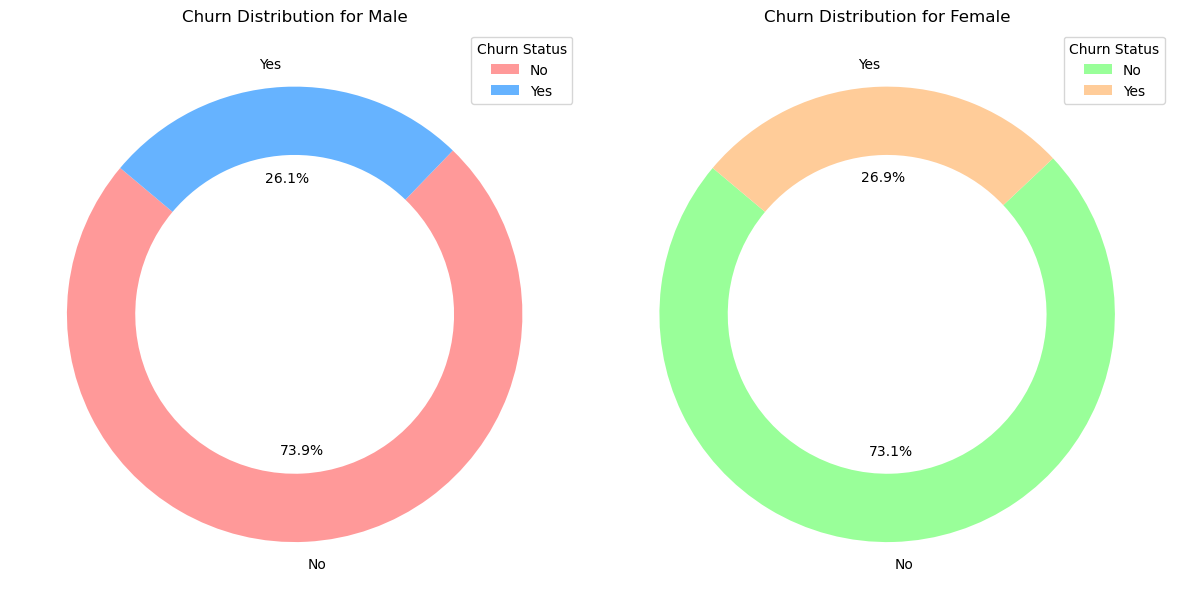

In [550]:

# Create a pivot table to show Churn distribution based on Gender
churn_gender_distribution = churn_data.groupby('gender')['Churn'].value_counts()


# Set up the figure
plt.figure(figsize=(12, 6))

# Plot for Male (Donut Chart)
plt.subplot(1, 2, 1)  # (rows, columns, position)
male_churn_counts = churn_gender_distribution['Male']
plt.pie(male_churn_counts, labels=male_churn_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_churn_male, wedgeprops=dict(width=0.3))
plt.title('Churn Distribution for Male')

# Plot for Female (Donut Chart)
plt.subplot(1, 2, 2)  # (rows, columns, position)
female_churn_counts = churn_gender_distribution['Female']
plt.pie(female_churn_counts, labels=female_churn_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_churn_female, wedgeprops=dict(width=0.3))
plt.title('Churn Distribution for Female')

# Add legends for both donut charts
plt.subplot(1, 2, 1)
plt.legend(male_churn_counts.index, loc="best", title="Churn Status")
plt.subplot(1, 2, 2)
plt.legend(female_churn_counts.index, loc="best", title="Churn Status")

# Display the plot
plt.tight_layout()
plt.show()


Both genders behaved in similar fashion 

C:\Users\Sushma\AppData\Local\Temp\ipykernel_2204\1738350162.py:9: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data=churn_data, x='Churn', hue='Contract', kde=False, discrete=True, multiple="dodge", bins=3, shrink=0.8, palette = palette )


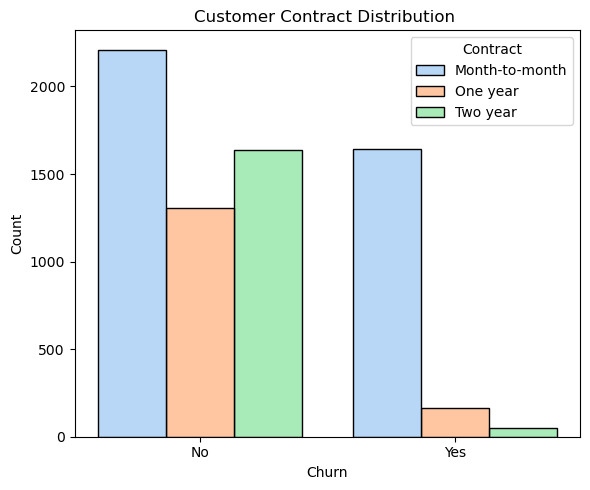

In [552]:
#CUSTOMER CONTRACT DISTRIBUTION

palette = sns.color_palette("pastel")

# Set up the figurepastel
plt.figure(figsize=(6,5))

# Plot the histogram for 'Contract' with respect to 'Churn' using seaborn histplot
sns.histplot(data=churn_data, x='Churn', hue='Contract', kde=False, discrete=True, multiple="dodge", bins=3, shrink=0.8, palette = palette )

# Title and labels
plt.title('Customer Contract Distribution ')
plt.xlabel('Churn')
plt.ylabel('Count')


# Display the plot
plt.tight_layout()
plt.show()


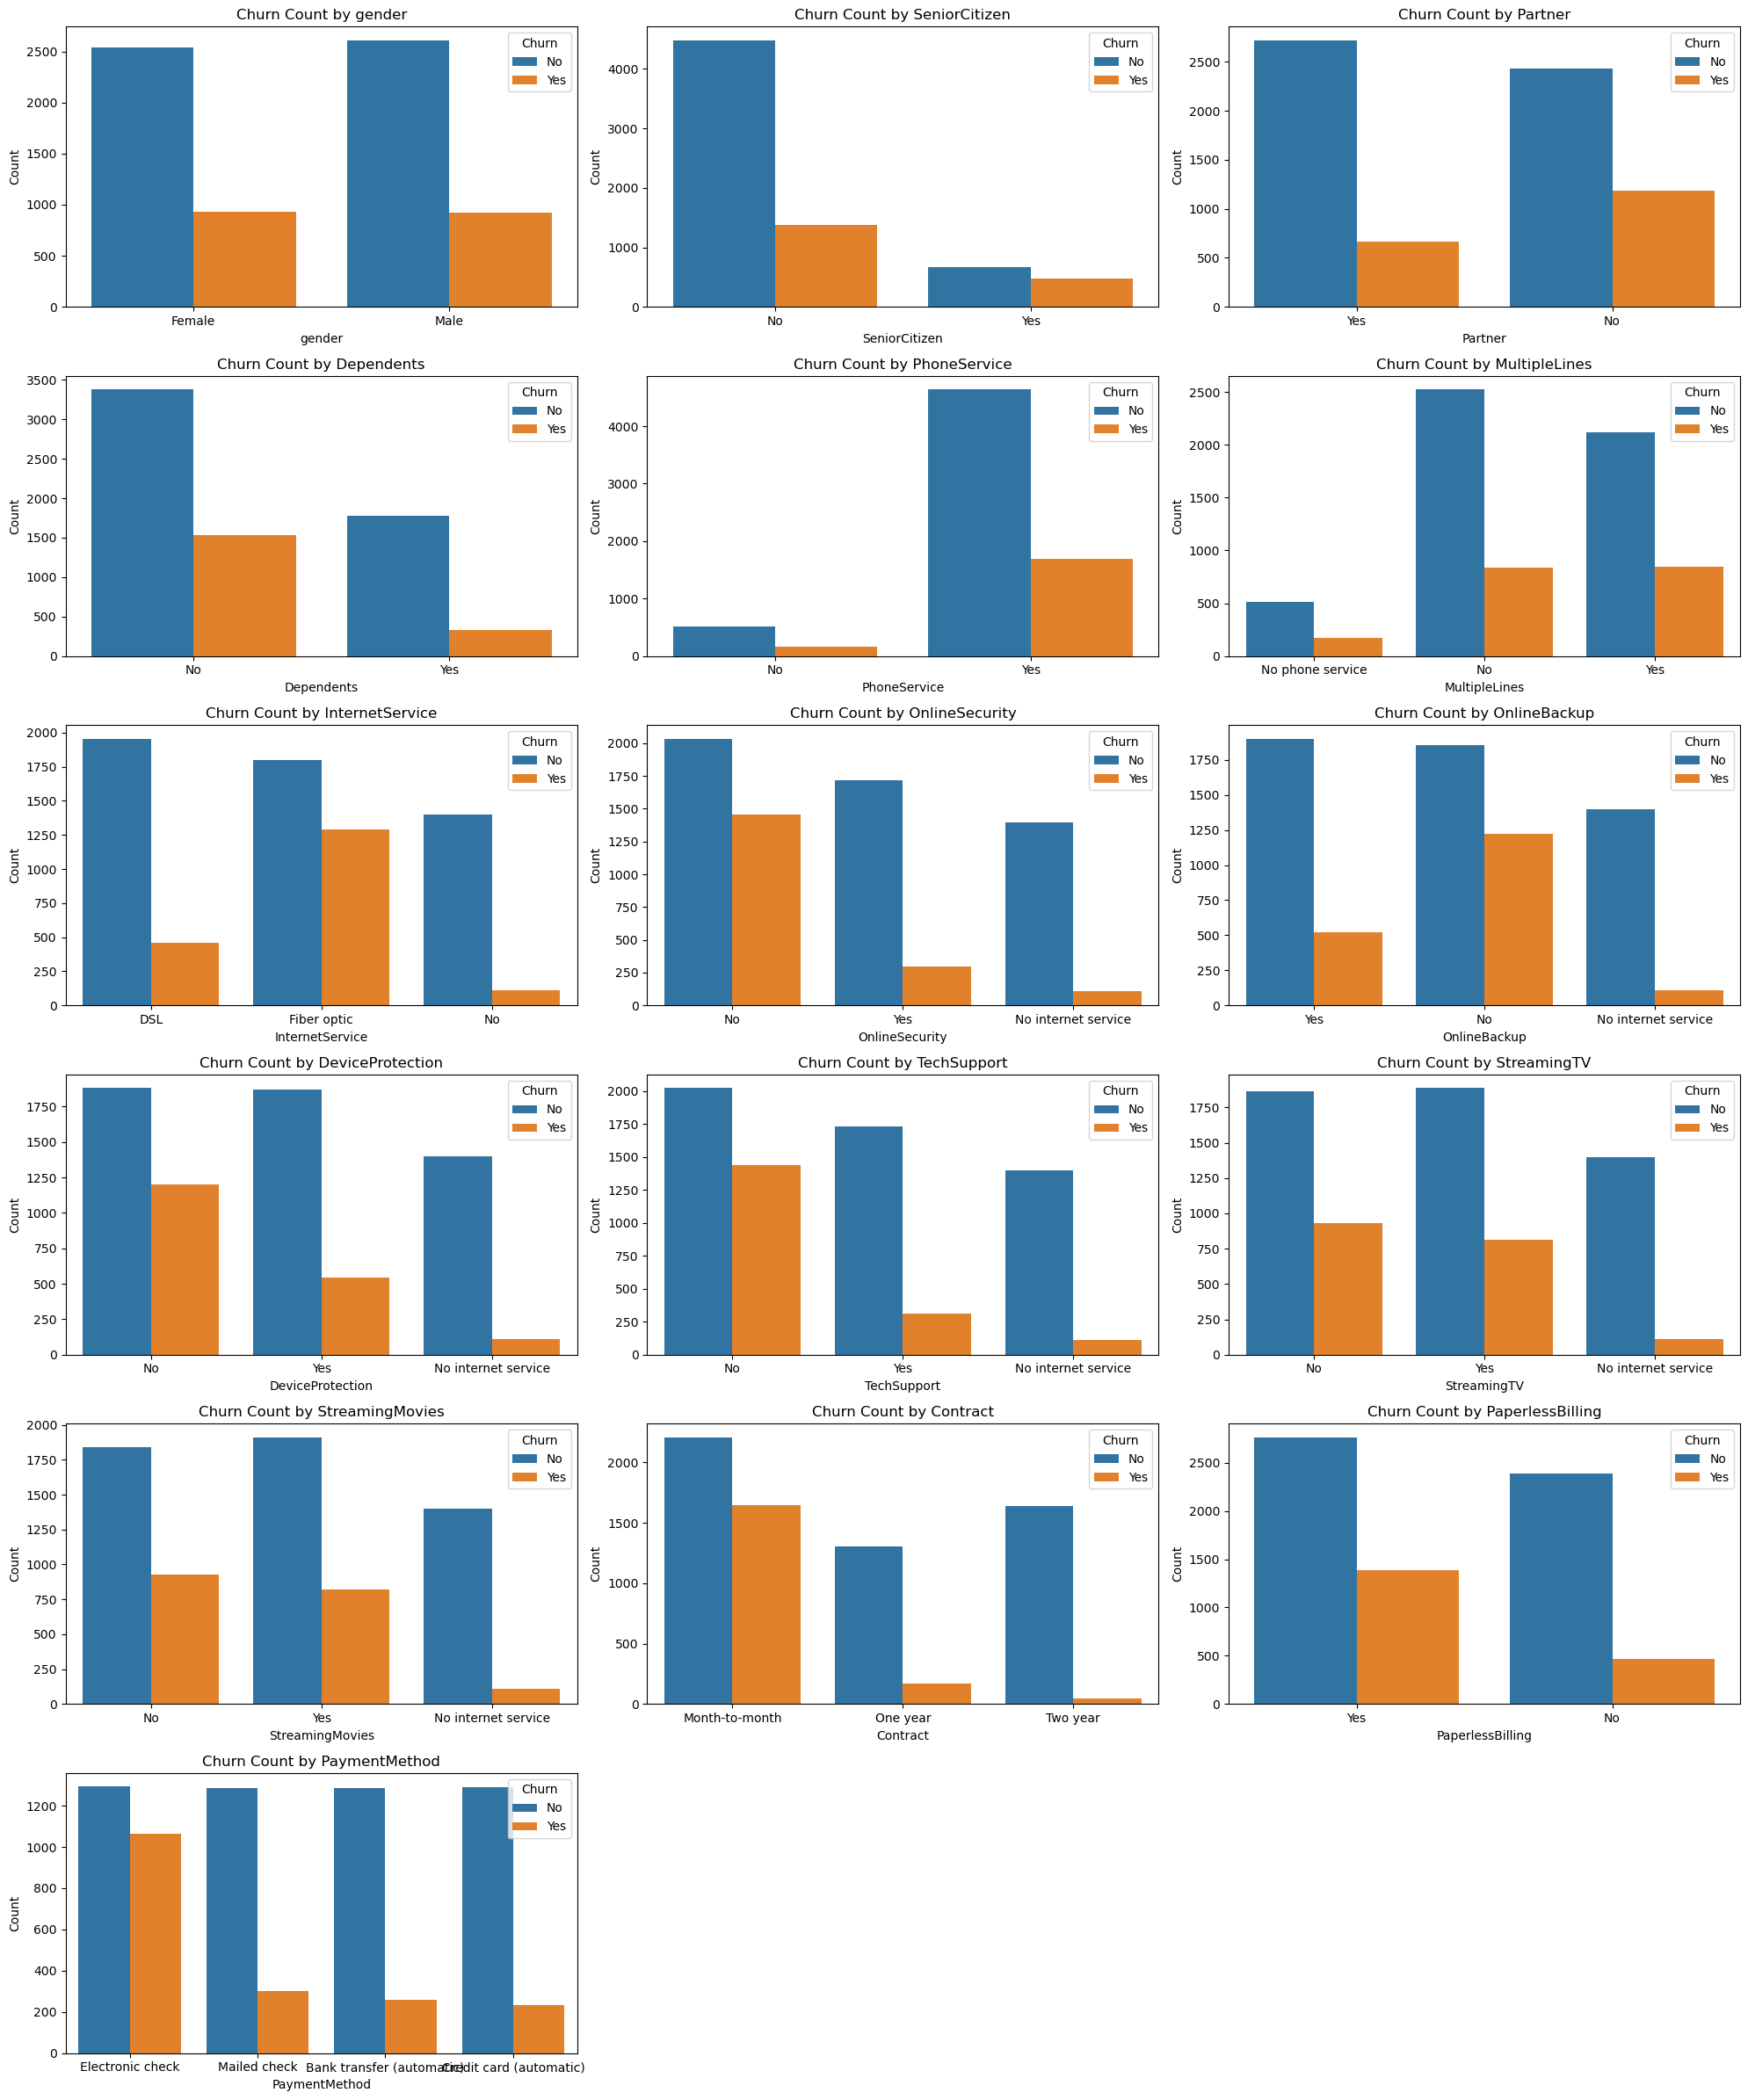

In [553]:
# List of columns to plot against 'Churn'
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                   'PaymentMethod']

# Determine the number of rows and columns for the subplots grid
num_plots = len(columns_to_plot)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()


# Create count plots for each column against 'Churn'
for idx, column in enumerate(columns_to_plot):
    color_pair = color_pairs[idx % len(color_pairs)]
    sns.countplot(ax=axes[idx], x=column, hue='Churn', data=churn_data)  
    axes[idx].set_title(f'Churn Count by {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Churn')

# Remove any unused subplots
for ax in axes[num_plots:]:
    ax.remove()

plt.tight_layout()
plt.show()

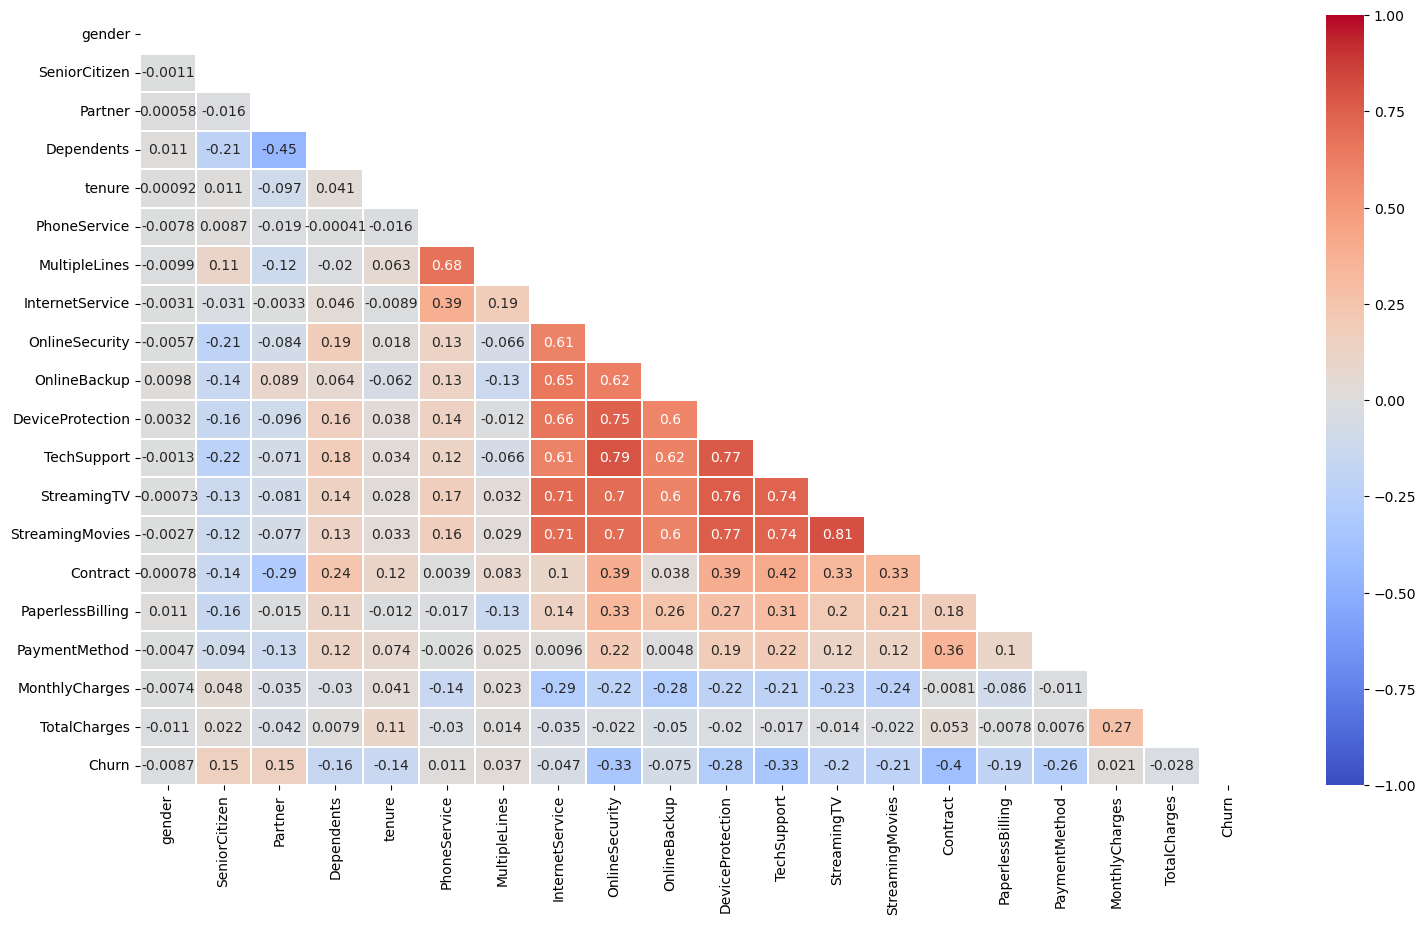

In [554]:
plt.figure(figsize=(18, 10))

corr = churn_data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

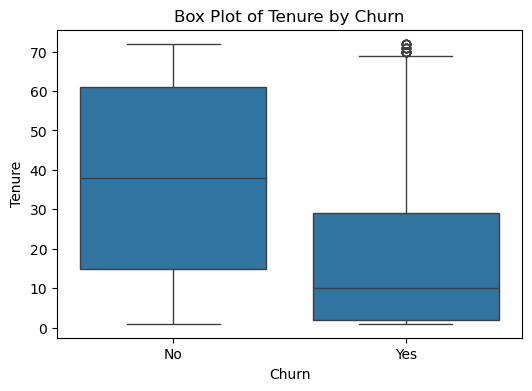

In [555]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=churn_data)
plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

DATA PREPROCESSING AND ML MODEL

In [557]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
# Additional classifiers
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [558]:
df = churn_data

In [559]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [560]:
#splitting the data
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 40)

In [561]:
results = {
    'Model': [],
    'Avg Score': [],
}

Logistic Regression
Cross-Validation Scores: [0.79837067 0.79531568 0.79816514 0.80632008 0.80530071]
Avg Cross-Validation Score: 0.8006944574201063
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1548
           1       0.65      0.58      0.62       555

    accuracy                           0.81      2103
   macro avg       0.75      0.74      0.74      2103
weighted avg       0.80      0.81      0.80      2103



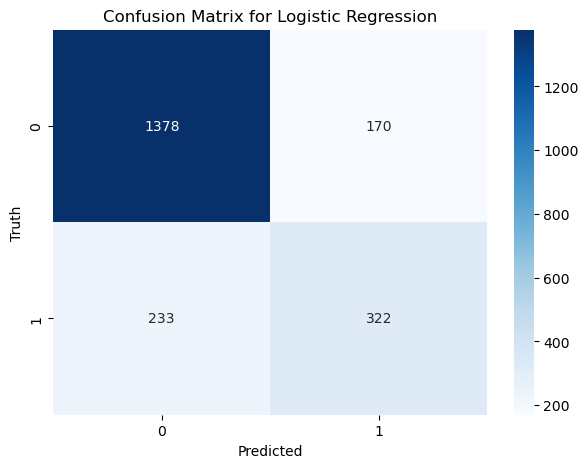

In [562]:
# Logistic Regression
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Cross-validation scores
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_avg_score = np.average(lr_cv_scores)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
lr_classification_report = classification_report(y_test, y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr)

# Print results
print("Logistic Regression")
print("Cross-Validation Scores:", lr_cv_scores)
print("Avg Cross-Validation Score:", lr_avg_score)  # Corrected variable name
print("Classification Report:\n", lr_classification_report)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 'fmt=d' ensures the annotations are integers
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Logistic Regression')

# Store results
results['Model'].append('Logistic Regression')
results['Avg Score'].append(lr_avg_score)


SVM
Cross-Validation Scores: [0.79633401 0.78615071 0.79001019 0.78593272 0.78797146]
Average Cross-Validation Score: 0.7892798196279204
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1548
           1       0.68      0.51      0.58       555

    accuracy                           0.81      2103
   macro avg       0.76      0.71      0.73      2103
weighted avg       0.80      0.81      0.80      2103



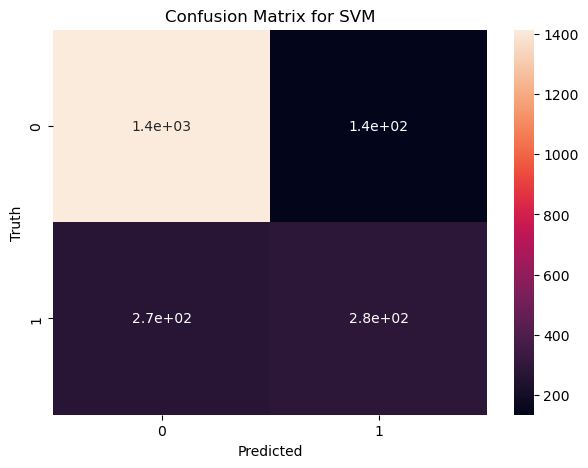

In [563]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)

# Cross-validation scores
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm_avg_score = np.average(svm_cv_scores)

# Predictions and evaluation
y_pred_svm = svm.predict(X_test)
svm_classification_report = classification_report(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)

# Print results
print("SVM")
print("Cross-Validation Scores:", svm_cv_scores)
print("Average Cross-Validation Score:", svm_avg_score)
print("Classification Report:\n", svm_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for SVM')
plt.show()

# Store results
results['Model'].append('SVM')
results['Avg Score'].append(svm_avg_score)

Decision Tree
Cross-Validation Scores: [0.72810591 0.70773931 0.71865443 0.72273191 0.71763507]
Average Cross-Validation Score: 0.7189733241154233
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1548
           1       0.48      0.51      0.50       555

    accuracy                           0.73      2103
   macro avg       0.65      0.66      0.66      2103
weighted avg       0.73      0.73      0.73      2103



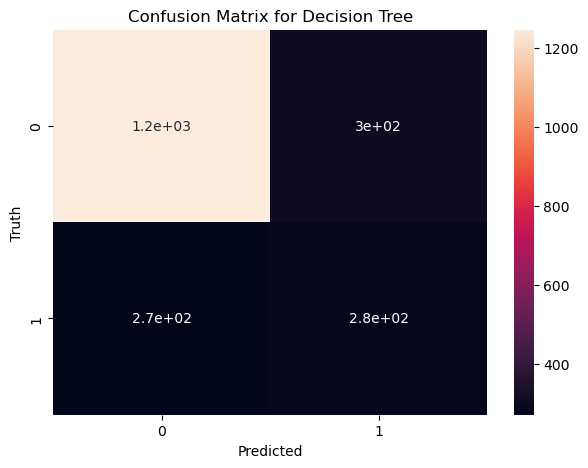

In [564]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Cross-validation scores
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
dt_avg_score = np.average(dt_cv_scores)

# Predictions and evaluation
y_pred_dt = dt.predict(X_test)
dt_classification_report = classification_report(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)

# Print results
print("Decision Tree")
print("Cross-Validation Scores:", dt_cv_scores)
print("Average Cross-Validation Score:", dt_avg_score)
print("Classification Report:\n", dt_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Store results
results['Model'].append('Decision Tree')
results['Avg Score'].append(dt_avg_score)

Random Forest
Cross-Validation Scores: [0.78716904 0.78309572 0.78389399 0.78899083 0.79102956]
Average Cross-Validation Score: 0.78683582777456
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1548
           1       0.62      0.51      0.56       555

    accuracy                           0.79      2103
   macro avg       0.73      0.70      0.71      2103
weighted avg       0.78      0.79      0.78      2103



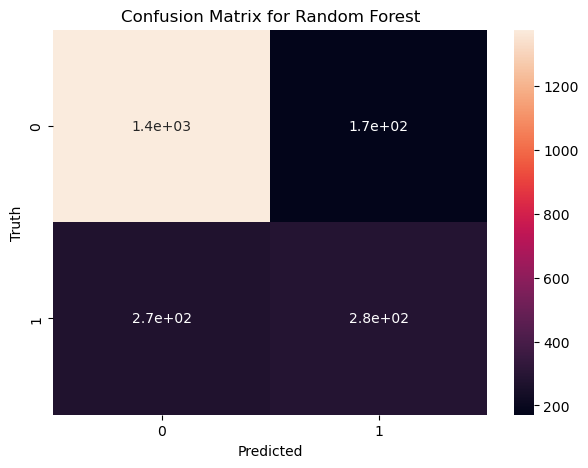

In [565]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Cross-validation scores
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_avg_score = np.average(rf_cv_scores)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rf_classification_report = classification_report(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

# Print results
print("Random Forest")
print("Cross-Validation Scores:", rf_cv_scores)
print("Average Cross-Validation Score:", rf_avg_score)
print("Classification Report:\n", rf_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Store results
results['Model'].append('Random Forest')
results['Avg Score'].append(rf_avg_score)

KNN
Cross-Validation Scores: [0.74338086 0.75356415 0.73394495 0.74617737 0.72579001]
Average Cross-Validation Score: 0.7405714689072002
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1548
           1       0.54      0.54      0.54       555

    accuracy                           0.76      2103
   macro avg       0.69      0.69      0.69      2103
weighted avg       0.76      0.76      0.76      2103



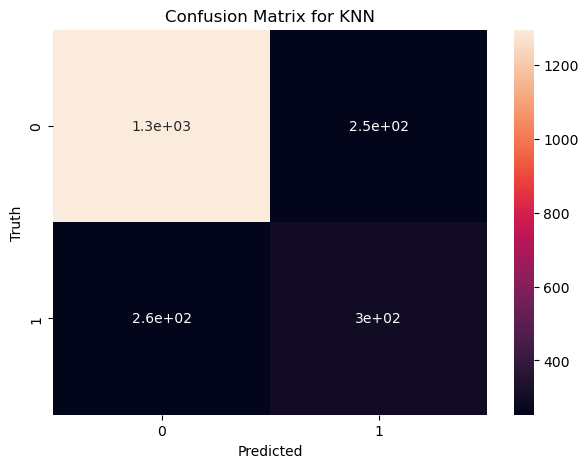

In [566]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Cross-validation scores
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_avg_score = np.average(knn_cv_scores)

# Predictions and evaluation
y_pred_knn = knn.predict(X_test)
knn_classification_report = classification_report(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)

# Print results
print("KNN")
print("Cross-Validation Scores:", knn_cv_scores)
print("Average Cross-Validation Score:", knn_avg_score)
print("Classification Report:\n", knn_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for KNN')
plt.show()

# Store results
results['Model'].append('KNN')
results['Avg Score'].append(knn_avg_score)

In [567]:
results_df = pd.DataFrame(results)
results_df

,Model,Avg Score
0,Logistic Regression,0.800694
1,SVM,0.789280
2,Decision Tree,0.718973
3,Random Forest,0.786836
4,KNN,0.740571
